# Лабораторная работа №5.1

Задача 1: Сравнение моделей

Метрики для логистической регрессии:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

ROC-AUC: 0.796523178807947

Метрики для решающего дерева (стандартные параметры):
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231

ROC-AUC: 0.6980546357615895

Задача 2: Исследование зависимости от глубины дерева


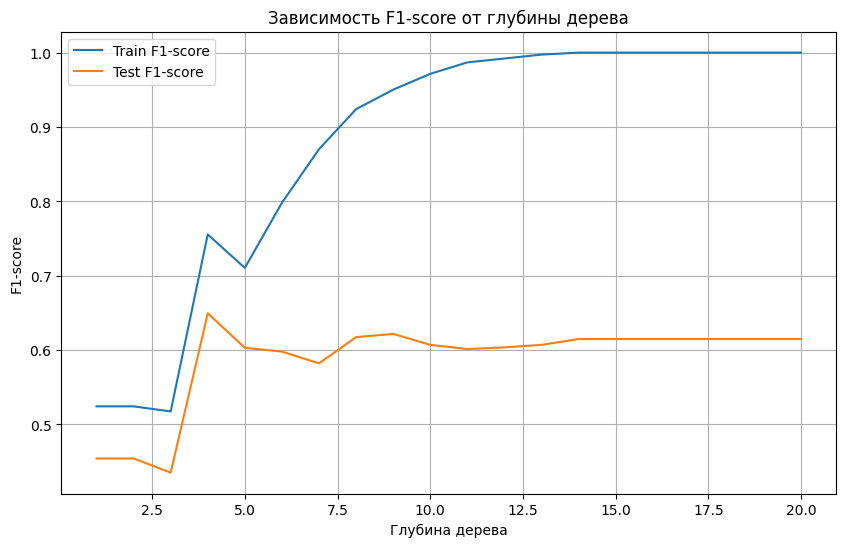

Оптимальная глубина дерева: 4

Задача 3: Анализ модели с оптимальной глубиной


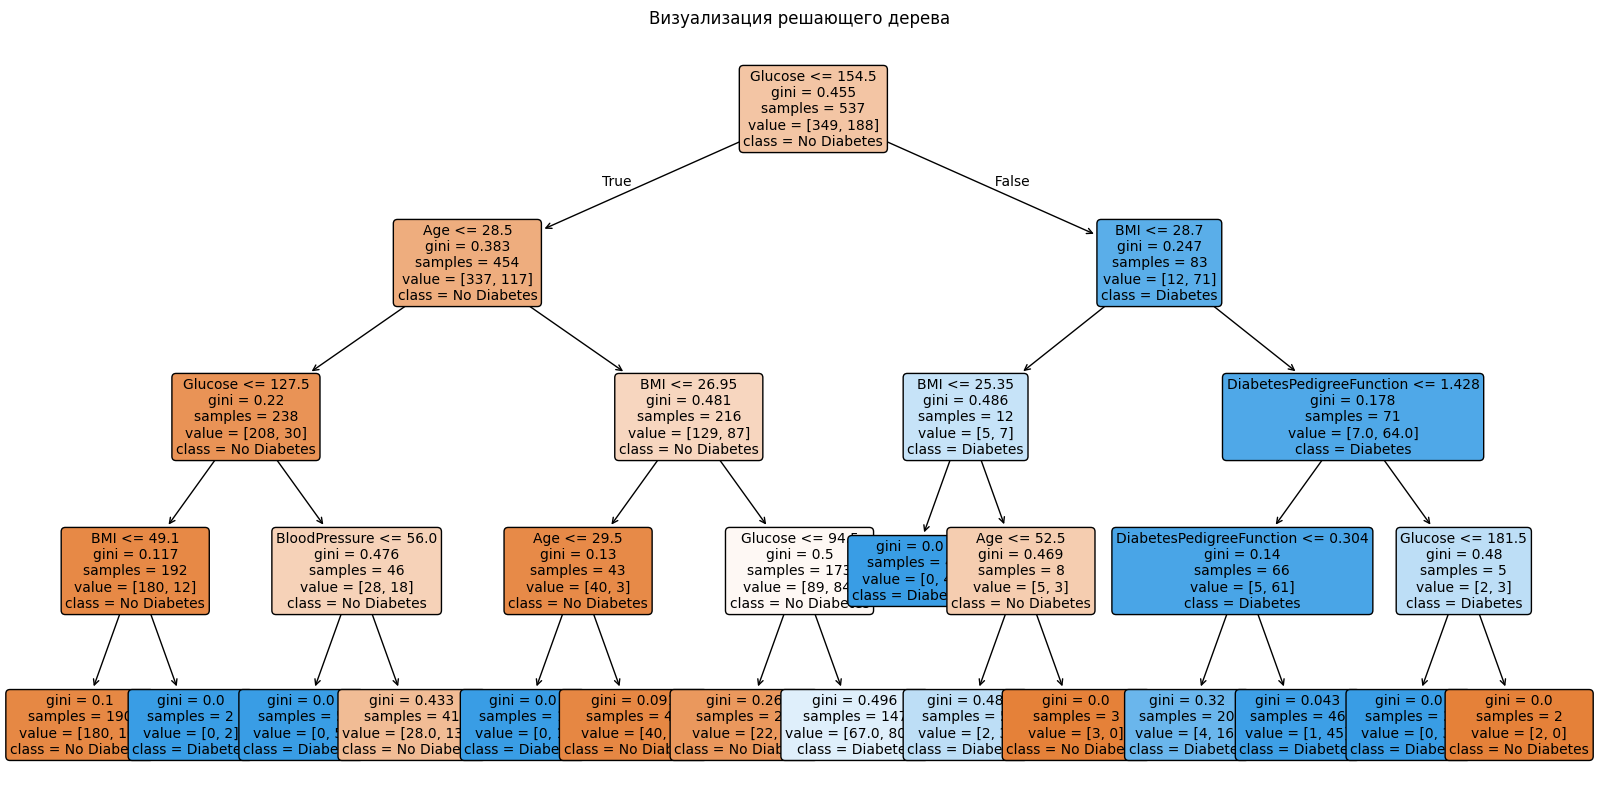

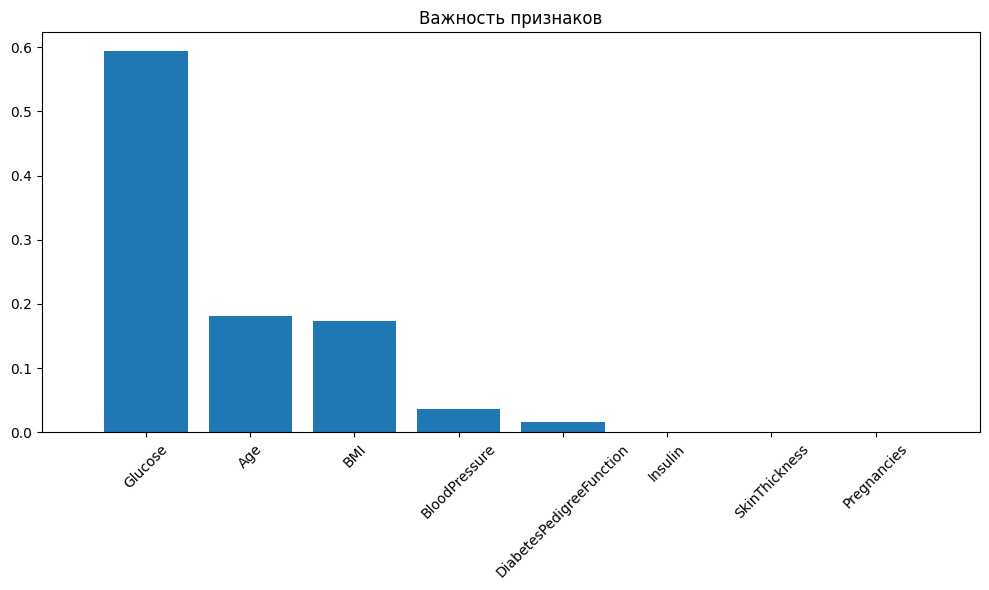

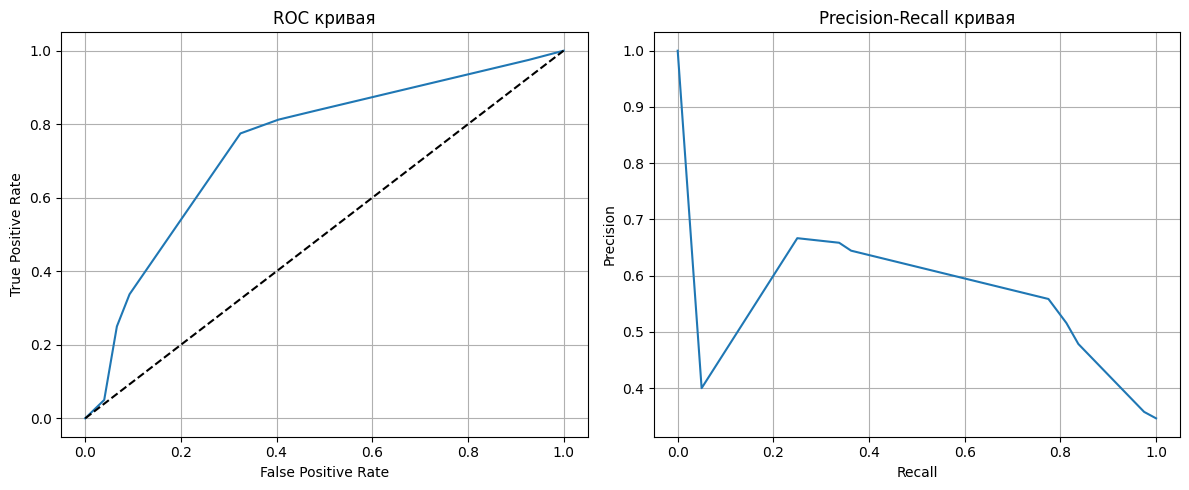


Задача 4: Исследование зависимости от max_features


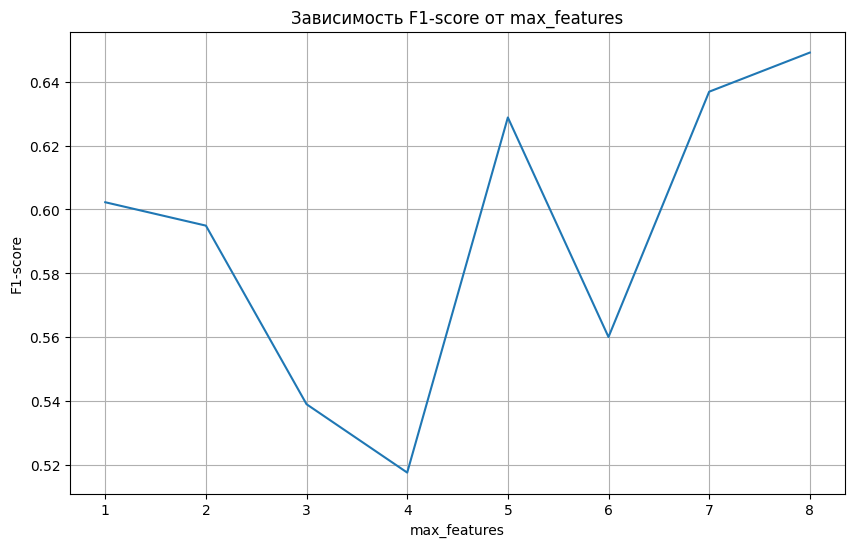

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, average_precision_score,
                            classification_report, confusion_matrix,
                            precision_recall_curve, roc_curve)
from sklearn.datasets import load_iris

diabetes = pd.read_csv('diabetes.csv')
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Логистическая регрессия
print("Задача 1: Сравнение моделей")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Решающее дерево
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("\nМетрики для логистической регрессии:")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))
print("\nМетрики для решающего дерева (стандартные параметры):")
print(classification_report(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, tree_clf.predict_proba(X_test)[:, 1]))

print("\nЗадача 2: Исследование зависимости от глубины дерева")
max_depths = range(1, 21)
train_scores = []
test_scores = []

for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    train_scores.append(f1_score(y_train, tree.predict(X_train)))
    test_scores.append(f1_score(y_test, tree.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Train F1-score')
plt.plot(max_depths, test_scores, label='Test F1-score')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от глубины дерева')
plt.legend()
plt.grid()
plt.show()

# Определение оптимальной глубины
optimal_depth = max_depths[np.argmax(test_scores)]
print(f"Оптимальная глубина дерева: {optimal_depth}")

print("\nЗадача 3: Анализ модели с оптимальной глубиной")
# Создание и обучение модели с оптимальной глубиной
optimal_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
optimal_tree.fit(X_train, y_train)

# Визуализация дерева с помощью matplotlib
plt.figure(figsize=(20, 10))
plot_tree(optimal_tree, 
          feature_names=X.columns,
          class_names=['No Diabetes', 'Diabetes'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Визуализация решающего дерева")
plt.show()

importances = optimal_tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Важность признаков")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

y_proba = optimal_tree.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.grid()

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.subplot(1, 2, 2)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая')
plt.grid()
plt.tight_layout()
plt.show()

print("\nЗадача 4: Исследование зависимости от max_features")
max_features_range = range(1, X.shape[1]+1)
test_scores_features = []

for n_features in max_features_range:
    tree = DecisionTreeClassifier(max_depth=optimal_depth, 
                                max_features=n_features, 
                                random_state=42)
    tree.fit(X_train, y_train)
    test_scores_features.append(f1_score(y_test, tree.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(max_features_range, test_scores_features)
plt.xlabel('max_features')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от max_features')
plt.grid()
plt.show()

Выполнено без использования библиотеки graphviz, так как возникли проблемы с её подключением.